In [37]:
from astropy.io import fits
from astropy.table import Table

import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = 6.674e-11 # m^3 kg^-1 s^-2
c = 3e5 # km/s
Msun = 1.989e30 # kg

h = 1
H0 = 100*h # km/s/Mpc

# Import galaxy data

In [4]:
dr = 17

if dr <= 16:
    data_directory = '/Users/kellydouglass/Documents/Research/data/SDSS/dr16/manga/spectro/analysis/v2_4_3/2.2.1/'
else: # dr >= 17
    data_directory = '/scratch/kdougla7/data/SDSS/dr17/manga/spectro/analysis/v3_1_1/3.1.0/'

if dr <= 16:
    DRP_directory = '/Users/kellydouglass/Documents/Research/data/SDSS/dr16/manga/spectro/redux/v2_4_3/'
else: # dr >= 17
    DRP_directory = '/scratch/kdougla7/data/SDSS/dr17/manga/spectro/redux/v3_1_1/'

In [29]:
galaxy_ID = '7443-1902'

plate, fiber = galaxy_ID.split('-')

if dr <= 16:
    galaxy_data = fits.open(data_directory + 'HYB10-GAU-MILESHC/' + plate + '/' + fiber + '/manga-' + galaxy_ID + '-MAPS-HYB10-GAU-MILESHC.fits.gz')
else: # dr >= 17
    galaxy_data = fits.open(data_directory + 'HYB10-MILESHC-MASTARSSP/' + plate + '/' + fiber + '/manga-' + galaxy_ID + '-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz')

# Extract H-alpha velocity map
if dr <= 16: # H-alpha is in channel 19
    Ha_vel = galaxy_data['EMLINE_GVEL'].data[18]
else: # dr >= 17, where H-alpha is in channel 24
    Ha_vel = galaxy_data['EMLINE_GVEL'].data[23]

# H-alpha mask extension
Ha_mask_extension = galaxy_data['EMLINE_GVEL'].header['QUALDATA']

# Extract stellar velocity map
star_vel = galaxy_data['STELLAR_VEL'].data

# Stellar velocity mask extension
star_vel_mask_extension = galaxy_data['STELLAR_VEL'].header['QUALDATA']

# Extract (and correct for instrumental resolution effects) stellar velocity dispersion map
if dr <= 16:
    star_sigma = np.sqrt(galaxy_data['STELLAR_SIGMA'].data**2 
                         - galaxy_data['STELLAR_SIGMACORR'].data**2)
else: # dr >= 17
    star_sigma = np.sqrt(galaxy_data['STELLAR_SIGMA'].data**2
                         - galaxy_data['STELLAR_SIGMACORR'].data[0]**2)
# See https://www.sdss.org/dr16/manga/manga-data/working-with-manga-data/ for correction details

# Stellar velocity dispersion mask extension
star_sigma_mask_extension = galaxy_data['STELLAR_SIGMA'].header['QUALDATA']

# Extract stellar mass density map
#sMass_density = galaxy_data[1].data[19]

# Extract average mass-to-light ratio map
#MtoL = galaxy_data[1].data[17]

# Extract average r-band image
r_band = galaxy_data['SPX_MFLUX'].data

/software/python3/3.6.5/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in sqrt


In [6]:
galaxy_data.info()

Filename: /scratch/kdougla7/data/SDSS/dr17/manga/spectro/analysis/v3_1_1/3.1.0/HYB10-MILESHC-MASTARSSP/7443/1902/manga-7443-1902-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   ()      
  1  SPX_SKYCOO    1 ImageHDU        44   (32, 32, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        49   (32, 32, 4)   float32   
  3  SPX_MFLUX     1 ImageHDU        37   (32, 32)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        38   (32, 32)   float32   
  5  SPX_SNR       1 ImageHDU        35   (32, 32)   float32   
  6  BINID         1 ImageHDU        46   (32, 32, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        44   (32, 32, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        49   (32, 32, 4)   float32   
  9  BIN_AREA      1 ImageHDU        36   (32, 32)   float32   
 10  BIN_FAREA     1 ImageHDU        35   (32, 32)   float32   
 11  BIN_MFLUX     1 ImageHDU        38   (32, 32)   float32

In [8]:
'''
master_filename = '../master_file.txt'

general_data = Table.read(master_filename, format='ascii.ecsv')
'''

if dr <= 16:
    drp_filename = DRP_directory + 'drpall-v2_4_3.fits'
else: # dr >= 17
    drp_filename = DRP_directory + 'drpall-v3_1_1.fits'

hdul = fits.open(drp_filename)
general_data = Table(hdul[1].data)
hdul.close()

In [9]:
general_data.colnames

['plate',
 'ifudsgn',
 'plateifu',
 'mangaid',
 'versdrp2',
 'versdrp3',
 'verscore',
 'versutil',
 'versprim',
 'platetyp',
 'srvymode',
 'objra',
 'objdec',
 'ifuglon',
 'ifuglat',
 'ifura',
 'ifudec',
 'ebvgal',
 'nexp',
 'exptime',
 'drp3qual',
 'bluesn2',
 'redsn2',
 'harname',
 'frlplug',
 'cartid',
 'designid',
 'cenra',
 'cendec',
 'airmsmin',
 'airmsmed',
 'airmsmax',
 'seemin',
 'seemed',
 'seemax',
 'transmin',
 'transmed',
 'transmax',
 'mjdmin',
 'mjdmed',
 'mjdmax',
 'gfwhm',
 'rfwhm',
 'ifwhm',
 'zfwhm',
 'mngtarg1',
 'mngtarg2',
 'mngtarg3',
 'catidnum',
 'plttarg',
 'manga_tileid',
 'nsa_iauname',
 'ifudesignsize',
 'ifutargetsize',
 'ifudesignwrongsize',
 'z',
 'zmin',
 'zmax',
 'szmin',
 'szmax',
 'ezmin',
 'ezmax',
 'probs',
 'pweight',
 'psweight',
 'psrweight',
 'sweight',
 'srweight',
 'eweight',
 'esweight',
 'esrweight',
 'nsa_field',
 'nsa_run',
 'nsa_camcol',
 'nsa_version',
 'nsa_nsaid',
 'nsa_nsaid_v1b',
 'nsa_z',
 'nsa_zdist',
 'nsa_sersic_absmag',
 'nsa_e

In [10]:
general_data['nsa_elpetro_th50_r']

general_data['plateifu']

general_data['nsa_elpetro_absmag'][10][4]

-20.2458

# Mask "bad" data

H$\alpha$ velocity map

In [11]:
if dr <= 16:
    mHa_vel = ma.array(Ha_vel, mask=galaxy_data[Ha_mask_extension].data[18] > 0)
else: # dr >= 17
    mHa_vel = ma.array(Ha_vel, mask=galaxy_data[Ha_mask_extension].data[23] > 0)

Ha_vel_max = np.max(np.abs(mHa_vel))

DAP stellar velocity map

In [12]:
mStar_vel = ma.array(star_vel, mask=galaxy_data[star_vel_mask_extension].data > 0)

star_vel_max = np.max(np.abs(mStar_vel))

DAP stellar velocity dispersion map

In [30]:
mStar_sigma = ma.array(star_sigma, mask=galaxy_data[star_sigma_mask_extension].data > 0)

mStar_sigma = ma.masked_invalid(mStar_sigma)

In [31]:
mr_band = ma.masked_equal(r_band, 0)

# Plot velocity map

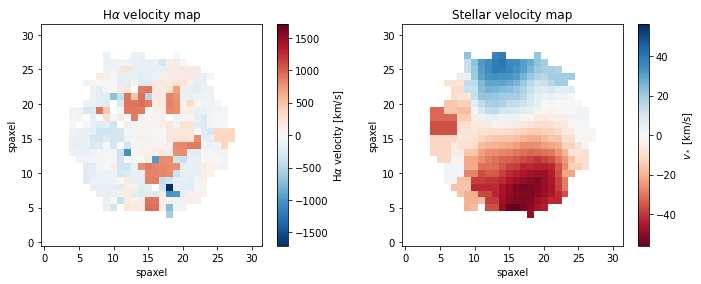

In [36]:
plt.figure(figsize=(10,4), tight_layout=True)

plt.subplot(121)
plt.title(r'H$\alpha$ velocity map')
plt.imshow(mHa_vel, cmap='RdBu_r', origin='lower')
cbar1 = plt.colorbar()
plt.clim(-Ha_vel_max, Ha_vel_max)
cbar1.ax.set_ylabel(r'H$\alpha$ velocity [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel')

plt.subplot(122)
plt.title('Stellar velocity map')
plt.imshow(mStar_vel, cmap='RdBu', origin='lower')
cbar2 = plt.colorbar()
plt.clim(-star_vel_max, star_vel_max)
cbar2.ax.set_ylabel(r'$v_*$ [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel');

# Velocity dispersion

/software/python3/3.6.5/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/software/python3/3.6.5/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


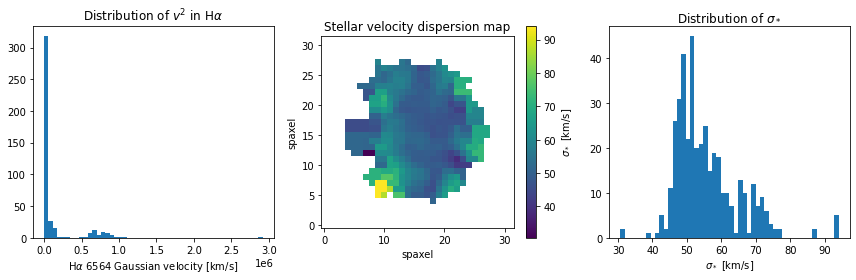

In [38]:
plt.figure(figsize=(12,4), tight_layout=True)

plt.subplot(131)
plt.title(r'Distribution of $v^2$ in H$\alpha$')
plt.hist(mHa_vel.flatten()**2, bins=50)
plt.xlabel(r'H$\alpha$ 6564 Gaussian velocity [km/s]')

plt.subplot(132)
plt.title('Stellar velocity dispersion map')
plt.imshow(mStar_sigma, origin='lower')
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\sigma_*$ [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel')

plt.subplot(133)
plt.title(r'Distribution of $\sigma_*$')
plt.hist(mStar_sigma.flatten(), bins=50)
plt.xlabel(r'$\sigma_*$ [km/s]');

Segev recommends that we use the median of the stellar velocity dispersion distribution for our mass calculations.

In [39]:
sigma_Ha = np.mean(mHa_vel*mHa_vel)

sigma_Ha

125164.7281553398

In [40]:
avg_star_sigma = np.nanmean(mStar_sigma)

median_star_sigma = ma.median(mStar_sigma)

# Convert from km/s to m/s
median_star_sigma_mpers = median_star_sigma*1000

median_star_sigma

53.214664

I should check this velocity dispersion against the Faber-Jackson relation.

For this galaxy, according to Figure 9 of Aguerri12, the median $\sigma_0$ is closer to the expected value for the velocity dispersion for a galaxy with this stellar mass than the central $\sigma_0$.

##### What if we use the velocity dispersion at the center of the galaxy?

In [41]:
# Center of galaxy is defined as the spaxel with the maximum luminosity
center_spaxel = np.unravel_index(ma.argmax(mr_band, axis=None), mr_band.shape)

center_star_sigma = mStar_sigma[center_spaxel]

# Convert from km/s to m/s
center_star_sigma_mpers = center_star_sigma*1000

center_star_sigma

48.825554

# Mass distribution

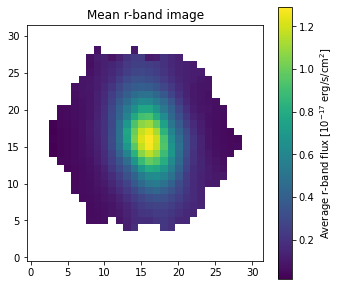

In [42]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('Mean r-band image')
plt.imshow(mr_band, origin='lower')
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel(r'Average r-band flux [10$^{-17}$ erg/s/cm$^2$]')
'''
plt.subplot(132)
plt.title('Pipe3d stellar mass density')
plt.imshow(sMass_density)
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel(r'Stellar mass density [log($M_\odot$)]')

plt.subplot(133)
plt.title('Pipe3d stellar mass-to-light ratio')
plt.imshow(MtoL)
cbar3 = plt.colorbar()
cbar3.ax.set_ylabel(r'M/L [log($M_\odot$/$L_\odot$)]')
''';

# Galaxy mass

We can use the virial theorem to calculate the total mass in an elliptical galaxy, since it is primarily supported by the stars' pressure rather than rotation.

\begin{equation}
  M \approx 2.5 \frac{\left< v^2 \right> r_h}{G} \approx 7.5 \frac{\sigma^2 r_h}{G}
\end{equation}

(Eqn. 20.17 from *Foundations of Astrophysics* by Ryden & Peterson) where $r_h$ is the half-light radius (really, the half-mass radius, but we cannot measure this).

So, first, we need to find $r_h$, presumably from the r-band image.

The total flux from the galaxy is not necessarily contained within the MaNGA footprint.  Ideally, then, we should use a total flux value from the legacy SDSS.  Then, we count out in consecutive annuli (using the NSA b/a, phi angles to start) until we reach 50% of this flux.  The resulting annulus is our $r_h$.

I have the 'NSA_index' in the master file, so I should be able to quickly extract other parameters from the NSA as needed.  At the moment, quantities that the NSA has that we might need for this analysis are:
* SERSICFLUX or nsa_sersic_flux - the 2D Sersic fit flux in FNugriz
* SERSIC_N or nsa_sersic_n - the 2D Sersic index
* SERSIC_BA or nsa_sersic_ba - the b/a axis ratio (already using)
* SERSIC_PHI or nsa_sersic_phi - the angle (E of N) of the major axis (already using)
* SERSIC_TH50 or nsa_sersic_th50 [arcsec] - 50% light radius along major axis from Sersic 2D fit

Or, we use the circular Petrosian fits:
* PETROTH50 or nsa_petro_th50 [arcsec] - 50% light radius from Petrosian fit

Or the **elliptical Petrosian** fits:
* **nsa_elpetro_th50_r**
* nsa_elpetro_ba
* nsa_elpetro_phi

## Locate galaxy in DRP table

In [43]:
gal_idx = general_data['plateifu'] == galaxy_ID

In [44]:
general_data['mangaid'][gal_idx]

12-49536


In [46]:
Mstar = general_data['nsa_elpetro_mass'][gal_idx] # Solar masses
z = general_data['z'][gal_idx]
r_half = general_data['nsa_elpetro_th50_r'][gal_idx] # arcsec

# Convert arcsec to kpc
r_half_kpc = (1000*c*z/H0)*np.tan(r_half*np.pi/(60*60*180))

# Convert kpc to m
r_half_m = 3.0857e19*r_half_kpc

## Calculate mass

In [47]:
def virial_mass(star_sigma, r_half):
    '''
    Calculate the virial mass of a galaxy
    
    PARAMETERS
    ==========
    
    star_sigma : float or numpy array
        Stellar velocity dispersion in m/s
        
    r_half : float or numpy array
        Half-light radius in m
        
    
    RETURNS
    =======
    
    Mvir_Msun : float or numpy array
        Virial mass in solar masses
    '''
    
    # Virial mass (in kg)
    Mvir = 7.5*star_sigma*star_sigma*r_half/G
    
    # Convert kg to Msun
    Mvir_Msun = Mvir/Msun
    
    return Mvir_Msun

#### Using median velocity dispersion

In [48]:
Mtot_Msun_median = virial_mass(median_star_sigma_mpers, r_half_m)

Mdark_median = Mtot_Msun_median - Mstar

#### Using central velocity dispersion

In [49]:
Mtot_Msun_center = virial_mass(center_star_sigma_mpers, r_half_m)

Mdark_center = Mtot_Msun_center - Mstar

# Mass ratio

In [50]:
MassRatio_median = Mdark_median/Mstar

MassRatio_median

1.3995961610558103


In [51]:
MassRatio_center = Mdark_center/Mstar

MassRatio_center

1.0200860047799283


In [52]:
np.log10(Mstar)

9.509327548874019


In [53]:
np.log10(median_star_sigma)

1.7260313